In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import open3d as o3d
def show_img(img):
    plt.close()
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.show()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [72]:
folder = "/mnt/Data/hieu/BlenderProc-3DFront/examples/datasets/front_3d_with_improved_mat/renderings_fixed/0a8d471a-2587-458a-9214-586e003e9cf9"
files = sorted(os.listdir(folder))
out_dir = "/mnt/Data/hieu/BlenderProc-3DFront/examples/datasets/front_3d_with_improved_mat/rgb/6a0e73bc-d0c4-4a38-bfb6-e083ce05ebe9"
os.makedirs(out_dir, exist_ok=True)

images = []
for file in files:
    path = os.path.join(folder, file)
    with h5py.File(path) as f:
        colors = np.array(f["colors"])
        images.append(colors)
        # plt.imsave(os.path.join(out_dir, f"{file.split('.')[0]}.png"), colors)

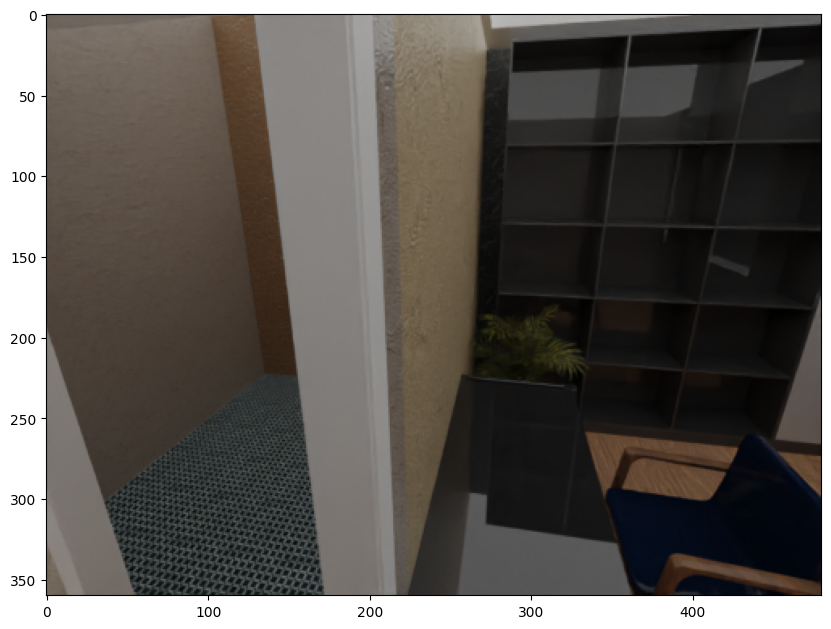

In [74]:
show_img(images[1])

In [77]:
def get_point_cloud(depth, K):
    """
    x left 
    y down 
    z front
    """
    u, v = np.meshgrid(range(depth.shape[1]), range(depth.shape[0]))
    x = (u - K[0][2]) * depth / K[0][0]
    y = (v - K[1][2]) * depth / K[1][1]
    return np.stack([x, y, depth], axis=-1)

TO_BLENDER = np.array([
    [1, 0, 0, 0], 
    [0, -1, 0, 0], 
    [0, 0, -1, 0], 
    [0, 0, 0, 1]
])
K = np.array([
    [240.0, 0, 239.5],
    [0, 240.0, 179.5],
    [0, 0, 1]
])
def transform(pcd, P):
    """
    pcd n,3
    """
    # pcd = pcd @ 
    pcd = pcd @ TO_BLENDER[:3, :3].T @ (P[:3, :3].T)   +  P[:3, 3]
    return pcd
    

In [84]:
folder = "/mnt/Data/hieu/BlenderProc-3DFront/examples/datasets/front_3d_with_improved_mat/renderings/0a8d471a-2587-458a-9214-586e003e9cf9"
files = sorted(os.listdir(folder))
infinite_depth = 10000000000.0
pcds = []
colors = []
for i, file in enumerate(files):
    path = os.path.join(folder, file)
    with h5py.File(path) as f:
        color = np.array(f["colors"])
        depth = np.array(f["depth"])
        depth[depth == infinite_depth] = 0
        cam_T = np.array(f["cam_Ts"])
        pcd = get_point_cloud(depth, K).reshape(-1, 3)
        color = color.reshape(-1, 3)
        pcd = transform(pcd, cam_T)
        pcds.append(pcd)
        colors.append(color)


In [85]:
pcds = np.concatenate(pcds, axis=0)

o3d_pcd = o3d.geometry.PointCloud()
o3d_pcd.points = o3d.utility.Vector3dVector(pcds)

mesh_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.6, origin=[0, 0, 0])
o3d.visualization.draw_geometries([o3d_pcd, mesh_frame])

In [1]:
a = "1"
b = ""
a  b

TypeError: unsupported operand type(s) for ^: 'str' and 'str'